In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Linear regression
# relationship between 2 variables 
# y = c + bx

In [3]:
import statsmodels.api as sm

In [6]:
df = pd.read_csv('Salary_Vs_Experience.csv')
df.head()

,Salary,Years_Of_Experience
0,157351,22
1,149491,19
2,139619,18
3,128640,29
4,93497,8


<Axes: >

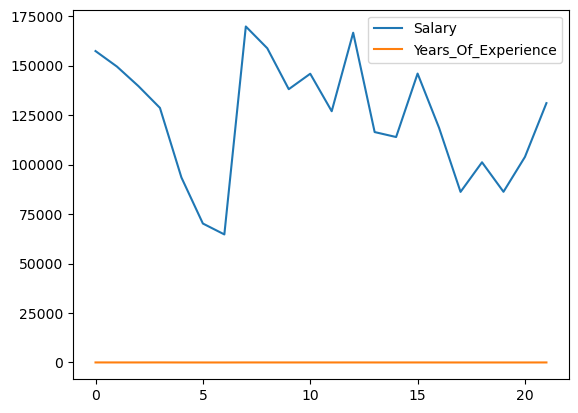

In [7]:
df.plot()

In [8]:
y = df['Salary'] 
X = df['Years_Of_Experience']
X = sm.add_constant(X)

In [9]:
model = sm.OLS(y,X)
fit = model.fit()

In [12]:
fit.summary() # AIC and BIC, go down model better

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.718
Model:                            OLS   Adj. R-squared:                  0.704
Method:                 Least Squares   F-statistic:                     50.89
Date:                Thu, 13 Jul 2023   Prob (F-statistic):           6.53e-07
Time:                        14:16:51   Log-Likelihood:                -244.02
No. Observations:                  22   AIC:                             492.0
Df Residuals:                      20   BIC:                             494.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                7.104e+04   8143.455      8.723      0.000    5.41e+04     8.8e+04
Years_Of_Experience  3795.7831    532.096      7.134      0.000    2685.850    4905.716
==============================================================================
Omnibus:                       14.241   Durbin-Watson:                   1.615
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               15.708
Skew:                          -1.274   Prob(JB):                     0.000388
Kurtosis:                       6.263   Cond. No.                         35.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [11]:
fit.params

const                  71039.078397
Years_Of_Experience     3795.783087
dtype: float64

In [13]:
predict = fit.predict([1,20])
predict

array([146954.74013082])

In [14]:
df = pd.read_csv('Salary_Vs_Experience_DirectReports.csv')
df

,Salary,Years_Of_Experience,Num_of_Direct_Reports
0,157351,22,19
1,149491,19,10
2,139619,18,13
3,128640,29,29
4,93497,8,0
5,70208,4,0
6,64703,3,0
7,169772,21,11
8,158759,17,15
9,138086,15,12


In [16]:
y = df['Salary'] 
X = df[['Years_Of_Experience','Num_of_Direct_Reports']]
X = sm.add_constant(X)
model = sm.OLS(y,X)
fit = model.fit()

In [17]:
fit.summary() # better model

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.732
Method:                 Least Squares   F-statistic:                     29.64
Date:                Thu, 13 Jul 2023   Prob (F-statistic):           1.44e-06
Time:                        14:20:13   Log-Likelihood:                -242.36
No. Observations:                  22   AIC:                             490.7
Df Residuals:                      19   BIC:                             494.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  6.027e+04   9880.354      6.100      0.000    3.96e+04     8.1e+04
Years_Of_Experience    5491.3615   1090.129      5.037      0.000    3209.695    7773.028
Num_of_Direct_Reports -1752.7373    997.937     -1.756      0.095   -3841.443     335.968
==============================================================================
Omnibus:                        2.813   Durbin-Watson:                   1.537
Prob(Omnibus):                  0.245   Jarque-Bera (JB):                1.202
Skew:                          -0.347   Prob(JB):                        0.548
Kurtosis:                       3.910   Cond. No.                         53.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
fit.params

const                    60274.179834
Years_Of_Experience       5491.361529
Num_of_Direct_Reports    -1752.737340
dtype: float64

In [22]:
predict = fit.predict([1,20,12])
predict

array([149068.56233989])

In [28]:
df = pd.read_csv('companydata.csv')
df

,Date,TV,Radio,Newspaper,Sales
0,1/1/2000,230.1,37.8,69.2,22.1
1,2/1/2000,44.5,39.3,45.1,10.4
2,3/1/2000,17.2,45.9,69.3,12.0
3,4/1/2000,151.5,41.3,58.5,16.5
4,5/1/2000,180.8,10.8,58.4,17.9
...,...,...,...,...,...
195,4/1/2016,38.2,3.7,13.8,7.6
196,5/1/2016,94.2,4.9,8.1,14.0
197,6/1/2016,177.0,9.3,6.4,14.8
198,7/1/2016,283.6,42.0,66.2,25.5


In [24]:
df.isnull().sum()

Date         0
TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [29]:
df.shape

(200, 5)

In [30]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [31]:
import seaborn as sns

In [32]:
y = df['Sales']
X = df['TV']
X = sm.add_constant(X)
model = sm.OLS(y,X)
fit = model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     856.2
Date:                Thu, 13 Jul 2023   Prob (F-statistic):           7.93e-74
Time:                        14:26:15   Log-Likelihood:                -448.99
No. Observations:                 200   AIC:                             902.0
Df Residuals:                     198   BIC:                             908.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9748      0.323     21.624      0.000       6.339       7.611
TV             0.0555      0.002     29.260      0.000       0.052       0.059
==============================================================================
Omnibus:                        0.013   Durbin-Watson:                   2.029
Prob(Omnibus):                  0.993   Jarque-Bera (JB):                0.043
Skew:                          -0.018   Prob(JB):                        0.979
Kurtosis:                       2.938   Cond. No.                         338.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [35]:
y = df['Sales']
X = df[['TV','Radio','Newspaper']]
X = sm.add_constant(X)
model = sm.OLS(y,X)
fit = model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     605.4
Date:                Thu, 13 Jul 2023   Prob (F-statistic):           8.13e-99
Time:                        14:27:00   Log-Likelihood:                -383.34
No. Observations:                 200   AIC:                             774.7
Df Residuals:                     196   BIC:                             787.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6251      0.308     15.041      0.000       4.019       5.232
TV             0.0544      0.001     39.592      0.000       0.052       0.057
Radio          0.1070      0.008     12.604      0.000       0.090       0.124
Newspaper      0.0003      0.006      0.058      0.954      -0.011       0.012
==============================================================================
Omnibus:                       16.081   Durbin-Watson:                   2.251
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.655
Skew:                          -0.431   Prob(JB):                     9.88e-07
Kurtosis:                       4.605   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
y = df['Sales']
X = df[['TV','Radio']]
X = sm.add_constant(X)
model = sm.OLS(y,X)
fit = model.fit() # Best model
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     912.7
Date:                Thu, 13 Jul 2023   Prob (F-statistic):          2.39e-100
Time:                        14:27:19   Log-Likelihood:                -383.34
No. Observations:                 200   AIC:                             772.7
Df Residuals:                     197   BIC:                             782.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6309      0.290     15.952      0.000       4.058       5.203
TV             0.0544      0.001     39.726      0.000       0.052       0.057
Radio          0.1072      0.008     13.522      0.000       0.092       0.123
==============================================================================
Omnibus:                       16.227   Durbin-Watson:                   2.252
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.973
Skew:                          -0.434   Prob(JB):                     8.43e-07
Kurtosis:                       4.613   Cond. No.                         425.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

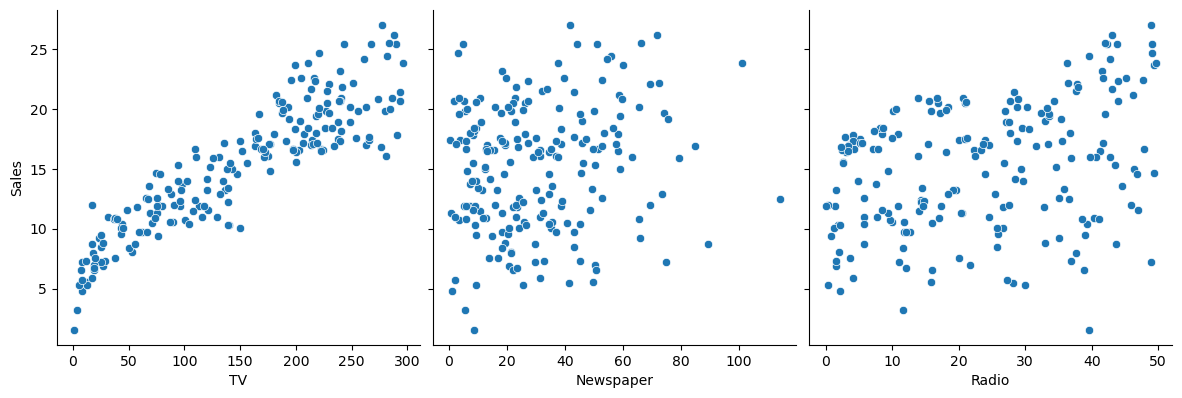

In [38]:
sns.pairplot(df,x_vars=['TV','Newspaper','Radio'],y_vars='Sales',height=4,aspect=1,kind='scatter')
plt.show() # used to compare variables 

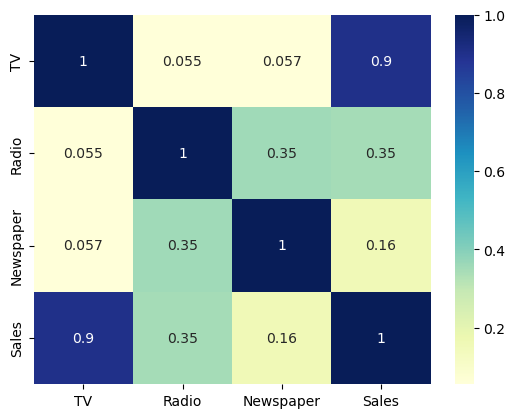

In [41]:
sns.heatmap(df.corr(numeric_only=True),cmap='YlGnBu',annot=True,)
plt.show()

In [42]:
y = df['Sales']
X = df['TV']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7,test_size=0.3,shuffle=True)

In [44]:
X_train_sm = sm.add_constant(X_train)
model = sm.OLS(y_train,X_train_sm)
fit = model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     653.9
Date:                Thu, 13 Jul 2023   Prob (F-statistic):           3.29e-54
Time:                        14:37:05   Log-Likelihood:                -315.09
No. Observations:                 140   AIC:                             634.2
Df Residuals:                     138   BIC:                             640.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.7935      0.383     17.752      0.000       6.037       7.550
TV             0.0572      0.002     25.571      0.000       0.053       0.062
==============================================================================
Omnibus:                        0.189   Durbin-Watson:                   2.146
Prob(Omnibus):                  0.910   Jarque-Bera (JB):                0.360
Skew:                          -0.000   Prob(JB):                        0.835
Kurtosis:                       2.752   Cond. No.                         335.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

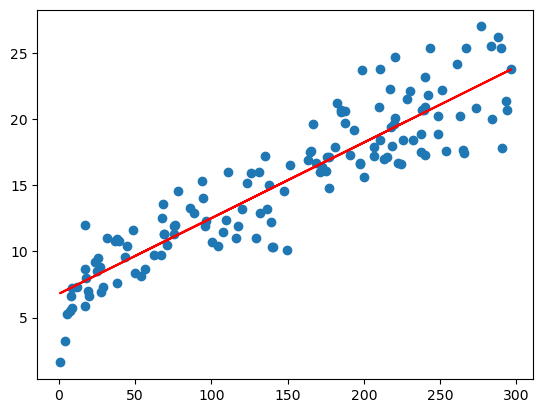

In [47]:
plt.scatter(X_train,y_train)
plt.plot(X_train,6.7935 + 0.0572*X_train,'r')
plt.show()

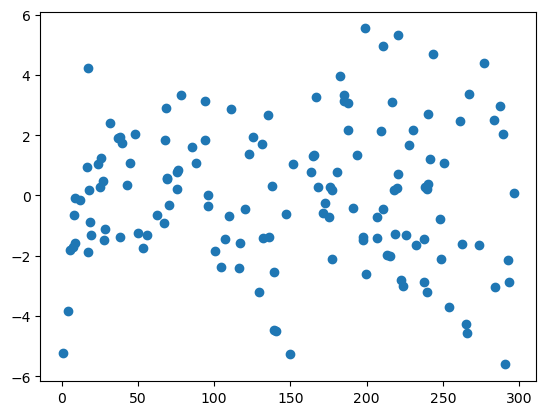

In [51]:
y_train_fitted = fit.fittedvalues
res = (y_train-y_train_fitted)
plt.scatter(X_train,res)
plt.show()

(array([ 5.,  4., 11., 29., 19., 29., 20., 13.,  6.,  4.]),
 array([-5.61109443, -4.49632903, -3.38156363, -2.26679824, -1.15203284,
        -0.03726744,  1.07749795,  2.19226335,  3.30702875,  4.42179414,
         5.53655954]),
 <BarContainer object of 10 artists>)

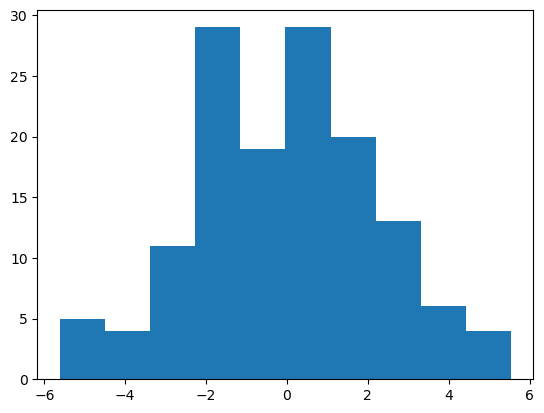

In [52]:
plt.hist(res)

In [53]:
X_test_sm = sm.add_constant(X_test)
y_test_pred = fit.predict(X_test_sm)

In [55]:
def accuracy(y_test,y_pred):
    from statsmodels.tools.eval_measures import rmse, rmspe, meanabs, mse
    from sktime.performance_metrics.forecasting import mean_absolute_percentage_error  
    RMSE = rmse(y_test,y_pred)
    RMSPE = rmspe(y_test,y_pred)
    MAE = meanabs(y_test,y_pred)
    MSE =  mse(y_test,y_pred)
    MAPE = mean_absolute_percentage_error(y_test,y_pred)    
    print(' Error Statistics : RMSE %f' % RMSE, '    RMSPE %f' % RMSPE, '    MAE %f' % MAE, '    MSE %f' % MSE , '      MAPE %f' % MAPE)

In [56]:
accuracy(y_test,y_test_pred)

 Error Statistics : RMSE 2.272596     RMSPE 1.670921     MAE 1.769628     MSE 5.164694       MAPE 0.127438


In [57]:
fit.bic # better model if lower

640.0679840795742

In [58]:
fit.aic

634.1846992343557

In [88]:
y = df['Sales']
X = df[['TV','Newspaper','Radio']]
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7,test_size=0.3,shuffle=True)
X_train_sm = sm.add_constant(X_train)
model = sm.OLS(y_train,X_train_sm)
fit = model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                     394.5
Date:                Thu, 13 Jul 2023   Prob (F-statistic):           6.97e-67
Time:                        15:00:57   Log-Likelihood:                -272.24
No. Observations:                 140   AIC:                             552.5
Df Residuals:                     136   BIC:                             564.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.7032      0.362     12.989      0.000       3.987       5.419
TV             0.0544      0.002     31.202      0.000       0.051       0.058
Newspaper      0.0001      0.007      0.017      0.987      -0.015       0.015
Radio          0.1092      0.010     10.688      0.000       0.089       0.129
==============================================================================
Omnibus:                       19.230   Durbin-Watson:                   2.043
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               38.718
Skew:                          -0.587   Prob(JB):                     3.91e-09
Kurtosis:                       5.294   Cond. No.                         414.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [63]:
X_test_sm = sm.add_constant(X_test)
y_test_pred = fit.predict(X_test_sm)

In [64]:
accuracy(y_test,y_test_pred)

 Error Statistics : RMSE 1.688873     RMSPE 1.806029     MAE 1.321679     MSE 2.852292       MAPE 0.106548


In [73]:
fit.bic # best model

567.5704479972678

In [67]:
fit.aic

543.5598579433732

In [69]:
y = df['Sales']
X = df[['TV','Radio']]
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7,test_size=0.3,shuffle=True)
X_train_sm = sm.add_constant(X_train)
model = sm.OLS(y_train,X_train_sm)
fit = model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.884
Model:                            OLS   Adj. R-squared:                  0.883
Method:                 Least Squares   F-statistic:                     523.4
Date:                Thu, 13 Jul 2023   Prob (F-statistic):           7.01e-65
Time:                        14:50:15   Log-Likelihood:                -276.37
No. Observations:                 140   AIC:                             558.7
Df Residuals:                     137   BIC:                             567.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.7745      0.387     12.325      0.000       4.008       5.540
TV             0.0542      0.002     30.002      0.000       0.051       0.058
Radio          0.1024      0.010     10.394      0.000       0.083       0.122
==============================================================================
Omnibus:                       15.128   Durbin-Watson:                   1.859
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.474
Skew:                          -0.591   Prob(JB):                     2.17e-05
Kurtosis:                       4.511   Cond. No.                         462.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [70]:
X_test_sm = sm.add_constant(X_test)
y_test_pred = fit.predict(X_test_sm)
accuracy(y_test,y_test_pred)

 Error Statistics : RMSE 1.398940     RMSPE 1.665882     MAE 1.014473     MSE 1.957034       MAPE 0.090626


In [71]:
fit.bic

567.5704479972678

In [72]:
fit.aic

558.7455207294399

In [74]:
# Regression Assumptions 

Text(0, 0.5, 'Fitted Sales')

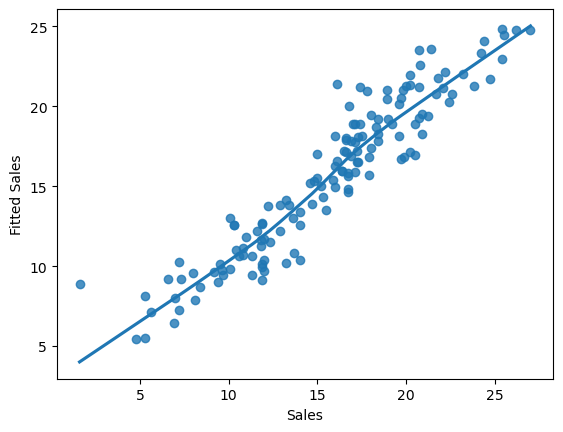

In [80]:
sns.regplot(x=y_train,y=fit.fittedvalues,lowess=True)
plt.xlabel('Sales')
plt.ylabel('Fitted Sales')

Text(0.5, 0, 'Sales')

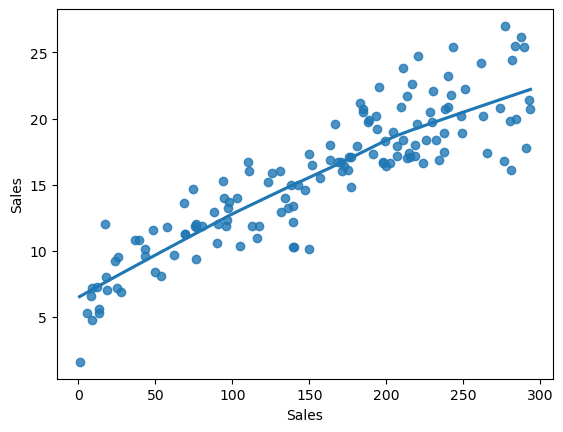

In [82]:
sns.regplot(x=X_train['TV'],y=y_train,lowess=True)
plt.xlabel('Sales')

Text(0.5, 0, 'Sales')

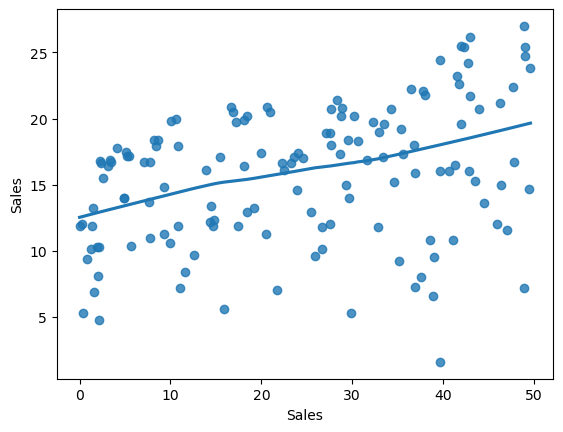

In [84]:
sns.regplot(x=X_train['Radio'],y=y_train,lowess=True)
plt.xlabel('Sales')

Text(0.5, 0, 'Sales')

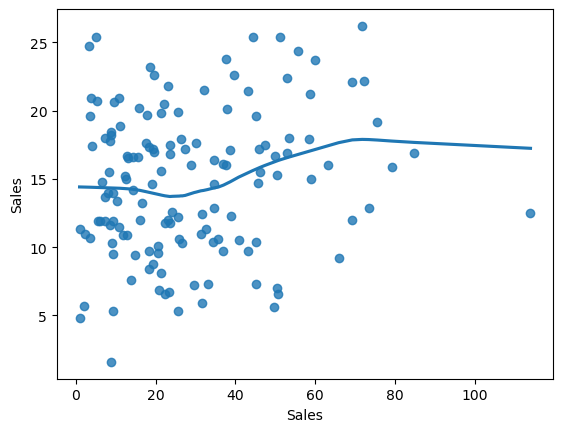

In [89]:
sns.regplot(x=X_train['Newspaper'],y=y_train,lowess=True)
plt.xlabel('Sales')

In [91]:
# Harvey-Collier Test
import statsmodels.stats.api as sms

In [92]:
sms.linear_harvey_collier(fit) # large p-value satisfy linearaility 

TtestResult(statistic=0.6336648465966153, pvalue=0.5273638247589532, df=136)

In [93]:
# student residuals vs fitted values 

In [94]:
student_residuals = pd.Series(np.abs(fit.get_influence().resid_studentized_internal))

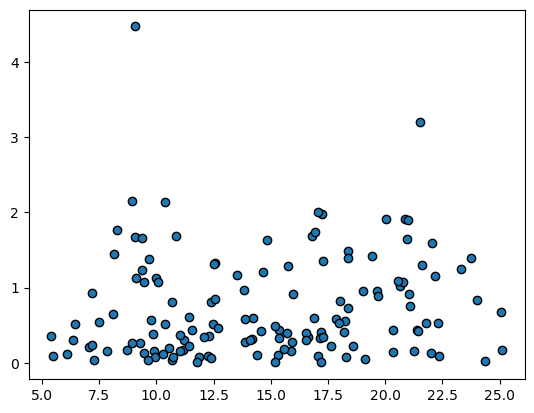

In [96]:
fig,ax = plt.subplots()
ax.scatter(fit.fittedvalues,student_residuals,edgecolors='k')
plt.show()

In [97]:
# Checking Stastisical indepence 
# look for patterns

Text(0, 0.5, 'Residuals')

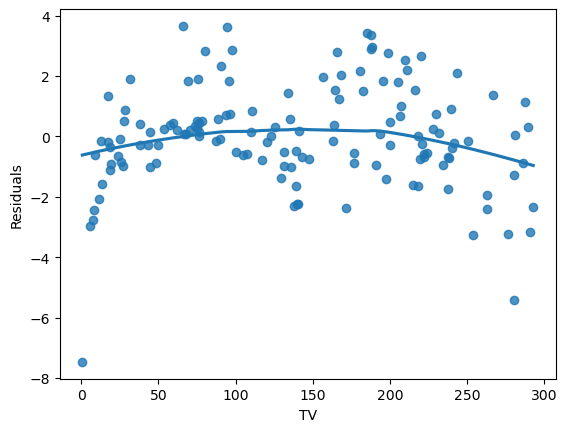

In [98]:
sns.regplot(x=X_train['TV'],y=fit.resid,lowess=True)
plt.ylabel('Residuals')

Text(0, 0.5, 'Residuals')

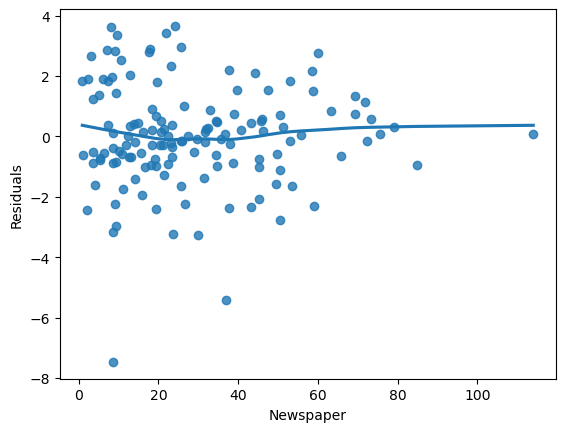

In [99]:
sns.regplot(x=X_train['Newspaper'],y=fit.resid,lowess=True)
plt.ylabel('Residuals')

Text(0, 0.5, 'Residuals')

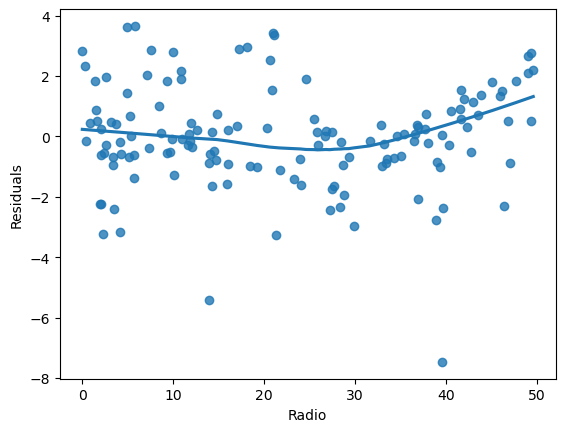

In [100]:
sns.regplot(x=X_train['Radio'],y=fit.resid,lowess=True)
plt.ylabel('Residuals')

Text(0, 0.5, 'Residuals')

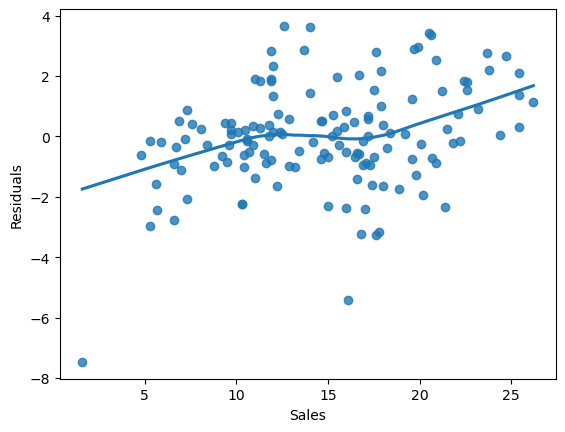

In [101]:
sns.regplot(x=y_train,y=fit.resid,lowess=True)
plt.ylabel('Residuals')

In [103]:
# Checking Homoscedscity 
# constant varaince of the erros

Text(0, 0.5, 'Residuals')

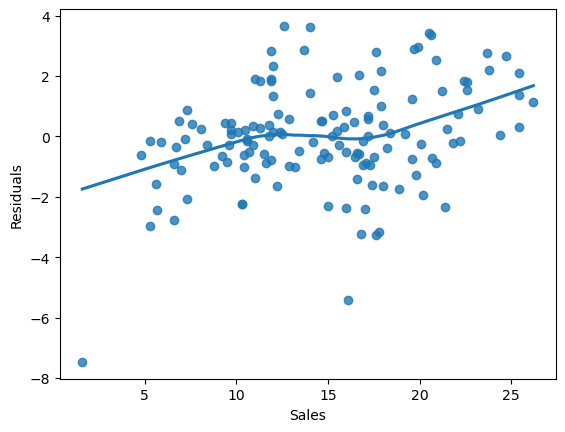

In [106]:
sns.regplot(x=y_train,y=fit.resid,lowess=True)
plt.xlabel('Sales')
plt.ylabel('Residuals')

Text(0, 0.5, 'Residuals')

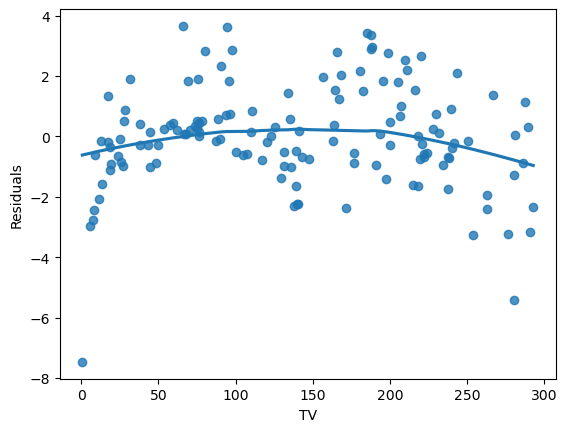

In [108]:
sns.regplot(x=X_train['TV'],y=fit.resid,lowess=True)
plt.xlabel('TV')
plt.ylabel('Residuals')

Text(0, 0.5, 'Residuals')

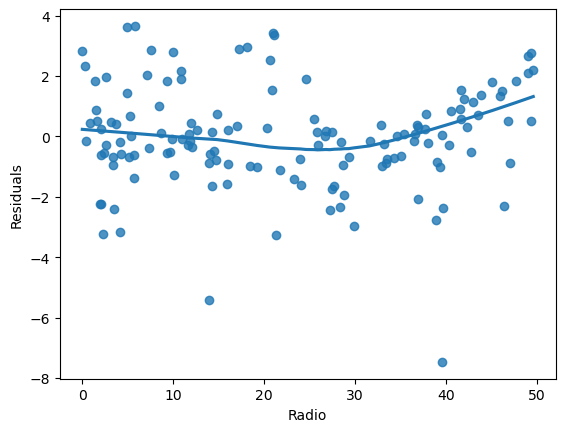

In [110]:
sns.regplot(x=X_train['Radio'],y=fit.resid,lowess=True)
plt.xlabel('Radio')
plt.ylabel('Residuals')

Text(0, 0.5, 'Residuals')

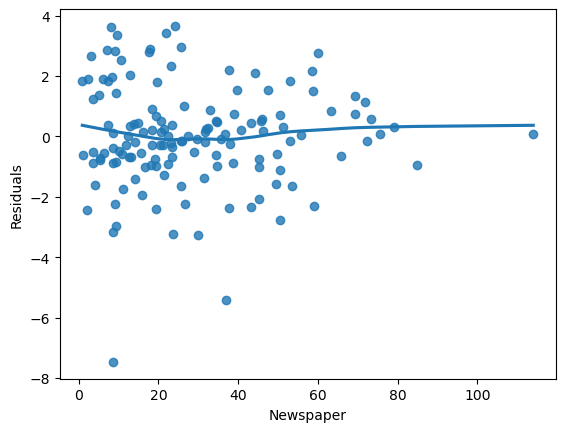

In [111]:
sns.regplot(x=X_train['Newspaper'],y=fit.resid,lowess=True)
plt.xlabel('Newspaper')
plt.ylabel('Residuals')

In [112]:
# influence stastics 

In [117]:
influence = fit.get_influence()

In [118]:
influence_summary = influence.summary_frame()
influence_summary.columns

Index(['dfb_const', 'dfb_TV', 'dfb_Newspaper', 'dfb_Radio', 'cooks_d',
       'standard_resid', 'hat_diag', 'dffits_internal', 'student_resid',
       'dffits'],
      dtype='object')

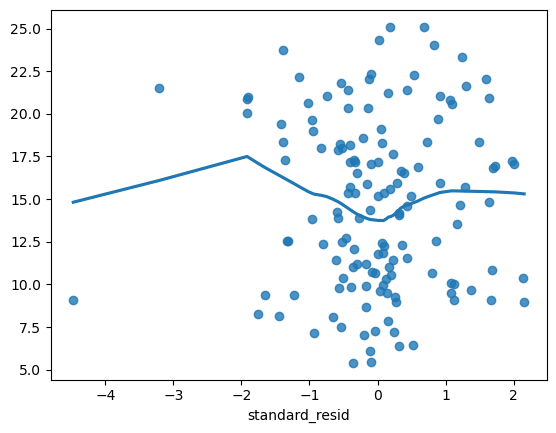

In [119]:
sns.regplot(x=influence_summary['standard_resid'],y=fit.fittedvalues,lowess=True)
plt.show()